In [1]:
! pip install netcdf4
! pip install Basemap
! pip install geopandas
! pip install cartopy
! pip install rasterio
! pip install rasterstats
! pip install numpy
! pip install pandas
! pip install shapely
! pip install pygeos
! pip install rtree
! pip install xarray
! pip install intake-esm
! pip install plotly
! pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 978.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.7 MB/s eta 0:00:00
  Preparing metadata (set

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import rasterio as rio
from rasterio.plot import show
import rasterstats
from affine import Affine
import cartopy.crs as ccrs
from rasterstats import zonal_stats
import pygeos
import rtree
import xarray as xr
import numpy.ma as ma
import plotly.express as px
import folium

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-2128b9c04d4b>:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling Py

In [ ]:
data_dir = "drive/MyDrive/Colab Notebooks/capstone/"
fn = '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20500101-20591231_combined.nc'
ds = nc.Dataset(fn)
print(ds.variables)

In [ ]:
ds.variables.keys()

dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'tas'])

In [ ]:
time_variable = ds['time']
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
tas = ds.variables['tas'][:]
print(tas.shape)

[12784.5 12785.5 12786.5 12787.5 12788.5 12789.5 12790.5 12791.5 12792.5
 12793.5]


In [ ]:
#global attributes of the dataset
print(ds.ncattrs())
for attr in ds.ncattrs():
  print(f'{attr}: {ds.getncattr(attr)}')


['Conventions', 'activity_id', 'branch_method', 'branch_time_in_child', 'branch_time_in_parent', 'creation_date', 'data_specs_version', 'experiment', 'experiment_id', 'external_variables', 'forcing_index', 'frequency', 'further_info_url', 'grid', 'grid_label', 'history', 'initialization_index', 'institution', 'institution_id', 'mip_era', 'nominal_resolution', 'parent_activity_id', 'parent_experiment_id', 'parent_mip_era', 'parent_source_id', 'parent_time_units', 'parent_variant_label', 'physics_index', 'product', 'realization_index', 'realm', 'source', 'source_id', 'source_type', 'sub_experiment', 'sub_experiment_id', 'table_id', 'table_info', 'title', 'variable_id', 'variant_label', 'license', 'cmor_version', 'tracking_id']
Conventions: CF-1.7 CMIP-6.2
activity_id: ScenarioMIP
branch_method: standard
branch_time_in_child: 0.0
branch_time_in_parent: 60265.0
creation_date: 2019-07-26T12:12:54Z
data_specs_version: 01.00.27
experiment: update of RCP8.5 based on SSP5
experiment_id: ssp585


In [ ]:
# Reshape the 'tas' variable to 2D
num_time_steps, num_lat, num_lon = tas.shape
tas_2d = tas.reshape(num_time_steps, num_lat * num_lon)
df = pd.DataFrame(tas_2d, columns=[f'Grid_{i}' for i in range(num_lat * num_lon)])
df['Latitude'] = lat[0]
df['Longitude'] = lon[0]
print(df)

          Grid_0      Grid_1      Grid_2      Grid_3      Grid_4      Grid_5  \
0     249.995132  249.211044  248.847458  249.789032  249.767075  249.355057   
1     250.811920  250.634079  250.700211  250.639236  250.652649  250.711563   
2     251.205276  251.079910  251.144989  251.155075  251.203583  251.218002   
3     250.744690  250.937820  250.459442  250.865555  250.757385  250.935120   
4     251.828842  251.779556  251.571335  251.861588  252.112671  251.932266   
...          ...         ...         ...         ...         ...         ...   
3647  247.151474  247.152969  247.166336  247.183212  247.202286  247.035614   
3648  247.546494  247.538315  247.545868  247.540405  247.560028  247.474503   
3649  245.428528  245.411072  245.413605  245.395844  245.414719  245.338745   
3650  244.389496  244.374649  244.380005  244.363571  244.385712  244.318802   
3651  245.306808  245.294632  245.306519  245.292084  245.324692  245.253220   

          Grid_6      Grid_7      Grid_

In [ ]:
temperature = ds['tas']
print(temperature)

<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: 1e+20
    standard_name: air_temperature
    long_name: Near-Surface Air Temperature
    comment: near-surface (usually, 2 meter) air temperature
    units: K
    original_name: temp2
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2019-07-26T12:12:54Z altered by CMOR: Treated scalar dimension: 'height'. 2019-07-26T12:12:54Z altered by CMOR: replaced missing value flag (-9e+33) with standard missing value (1e+20). 2019-07-26T12:12:54Z altered by CMOR: Inverted axis: lat.
    coordinates: height
    missing_value: 1e+20
unlimited dimensions: time
current shape = (3652, 192, 384)
filling on


DECADAL ANALYSIS

In [ ]:
#create decadal average file(2015-2024)
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20150101-20151231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20160101-20161231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20170101-20171231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20180101-20181231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20190101-20191231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20200101-20201231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20210101-20211231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20220101-20221231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20230101-20231231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20240101-20241231.nc'
]

datasets = [xr.open_dataset(file_path) for file_path in file_paths]
combined_dataset = xr.concat(datasets, dim='time')

decadal_average = combined_dataset['tas'].mean(dim='time')

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/2015-2024_decadal_average.nc'
decadal_average.to_netcdf(output_path)

for ds in datasets:
    ds.close()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#create decadal average file(2050-2059)
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20500101-20501231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20510101-20511231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20520101-20521231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20530101-20531231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20540101-20541231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20550101-20551231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20560101-20561231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20570101-20571231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20580101-20581231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20590101-20591231.nc'
]

datasets = [xr.open_dataset(file_path) for file_path in file_paths]
combined_dataset = xr.concat(datasets, dim='time')

decadal_average = combined_dataset['tas'].mean(dim='time')

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/2050-2059_decadal_average.nc'
decadal_average.to_netcdf(output_path)

for ds in datasets:
    ds.close()



In [ ]:
#create decadal average file(2090-2099)
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20900101-20901231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20910101-20911231.nc',
   '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20920101-20921231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20930101-20931231.nc',
'/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20940101-20941231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20950101-20951231.nc',
'/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20960101-20961231.nc',
  '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20970101-20971231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20980101-20981231.nc',
   '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20990101-20991231.nc',
]

datasets = [xr.open_dataset(file_path) for file_path in file_paths]
combined_dataset = xr.concat(datasets, dim='time')

decadal_average = combined_dataset['tas'].mean(dim='time')

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/2090-2099_decadal_average.nc'
decadal_average.to_netcdf(output_path)

for ds in datasets:
    ds.close()



**2015-2024 tas analysis**



/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


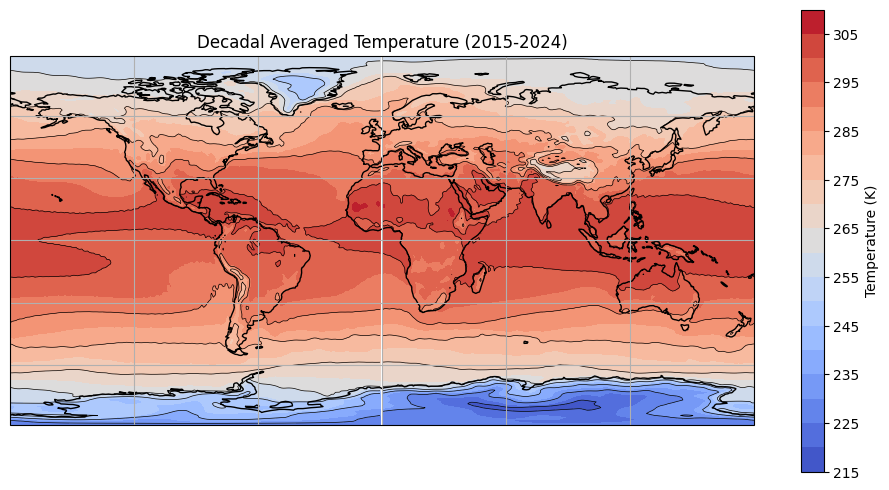

In [ ]:

decadal_average_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/2015-2024_decadal_average.nc'
decadal_average = xr.open_dataset(decadal_average_path)

lats = decadal_average['lat']
lons = decadal_average['lon']
tas_values = decadal_average['tas']

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour = plt.contourf(lons, lats, tas_values, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

contour_lines = plt.contour(lons, lats, tas_values, levels=10, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')

ax.coastlines()
ax.gridlines()

plt.title('Decadal Averaged Temperature (2015-2024)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()


**2050-2059 analysis**

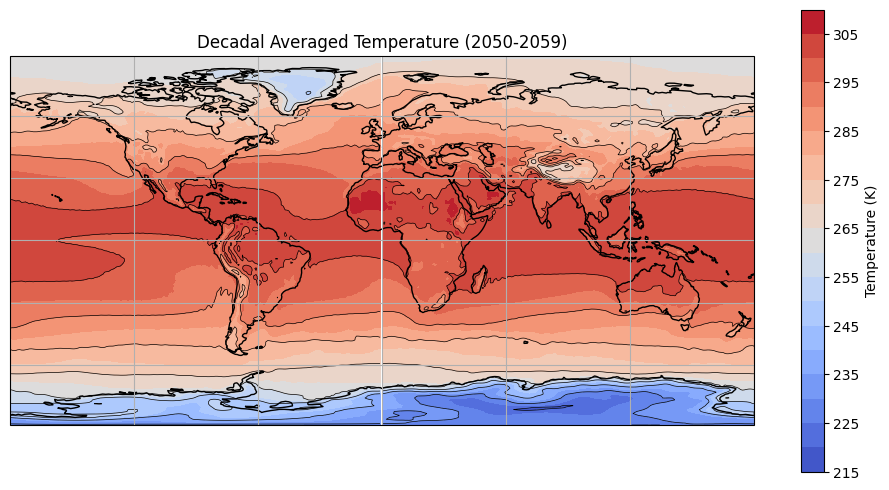

In [ ]:

decadal_average_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/2050-2059_decadal_average.nc'
decadal_average= xr.open_dataset(decadal_average_path)

lats = decadal_average['lat']
lons = decadal_average['lon']
tas_values = decadal_average['tas']

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour = plt.contourf(lons, lats, tas_values, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

contour_lines = plt.contour(lons, lats, tas_values, levels=10, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')

ax.coastlines()
ax.gridlines()

plt.title('Decadal Averaged Temperature (2050-2059)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()


**2090-2099 tas analysis**



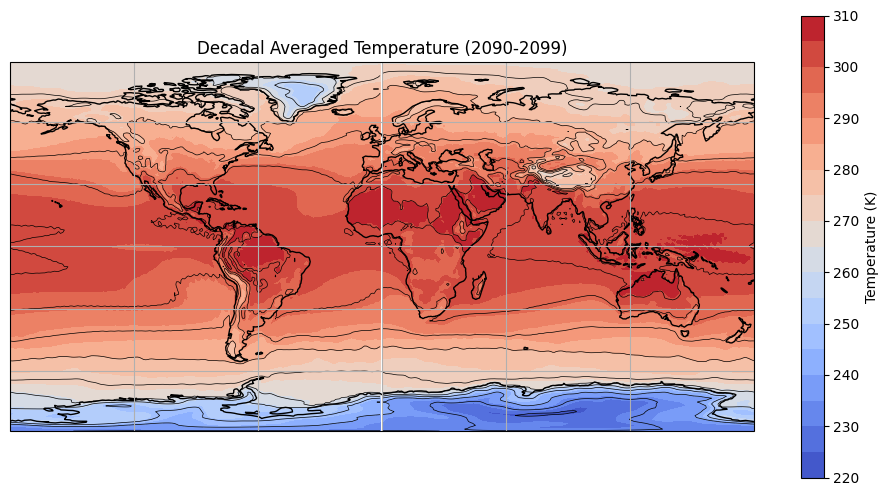

In [ ]:

decadal_average_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/2090-2099_decadal_average.nc'
decadal_average= xr.open_dataset(decadal_average_path)

lats = decadal_average['lat']
lons = decadal_average['lon']
tas_values = decadal_average['tas']

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour = plt.contourf(lons, lats, tas_values, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

contour_lines = plt.contour(lons, lats, tas_values, levels=10, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')

ax.coastlines()
ax.gridlines()

plt.title('Decadal Averaged Temperature (2090-2099)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()


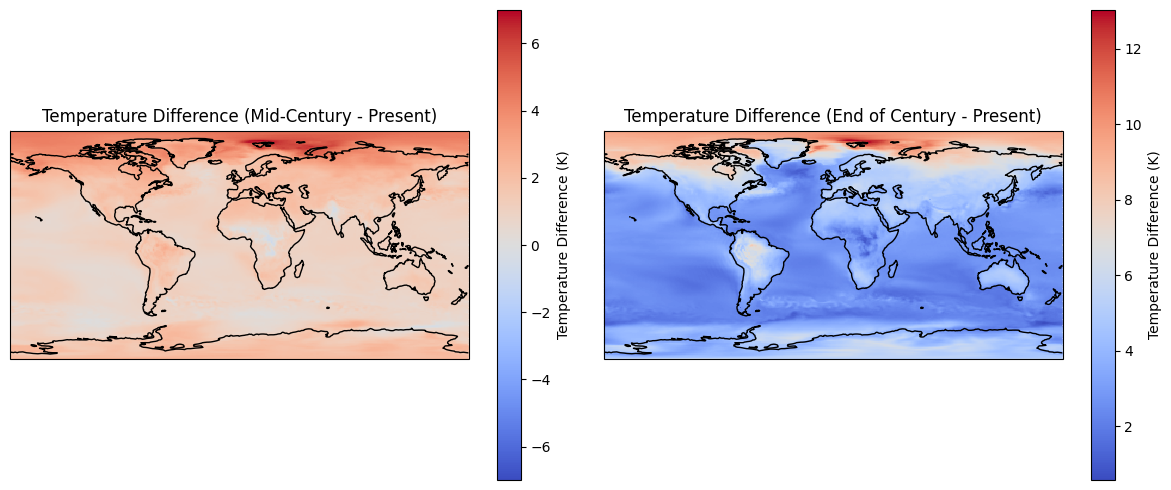

In [ ]:

decadal_average_path_1 = '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/2015-2024_decadal_average.nc'
ds_present  = xr.open_dataset(decadal_average_path_1)
decadal_average_path_2 = '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/2050-2059_decadal_average.nc'
ds_mid_century = xr.open_dataset(decadal_average_path_2)
decadal_average_path_3 = '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/2090-2099_decadal_average.nc'
ds_end_of_century = xr.open_dataset(decadal_average_path_3)

temp_diff_mid_century =  ds_mid_century['tas'] - ds_present['tas']
temp_diff_end_of_century =   ds_end_of_century['tas'] - ds_present['tas']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': ccrs.PlateCarree()})

temp_diff_mid_century.plot(ax=ax1, cmap='coolwarm', cbar_kwargs={'label': 'Temperature Difference (K)'})
ax1.set_title('Temperature Difference (Mid-Century - Present)')

temp_diff_end_of_century.plot(ax=ax2, cmap='coolwarm', cbar_kwargs={'label': 'Temperature Difference (K)'})
ax2.set_title('Temperature Difference (End of Century - Present)')

ax1.coastlines()
ax2.coastlines()

plt.tight_layout()
plt.show()




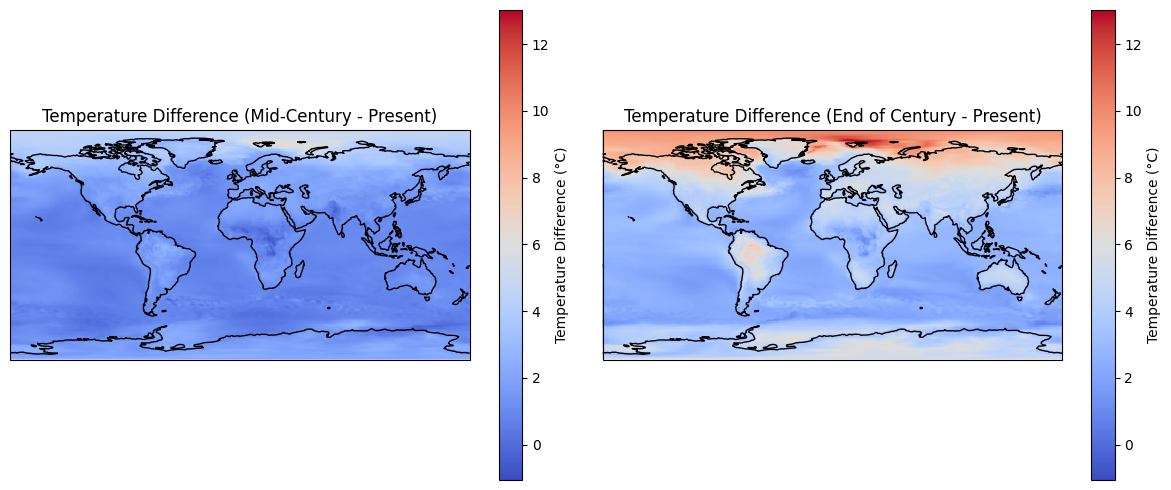

In [ ]:
decadal_average_path_1 = '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/2015-2024_decadal_average.nc'
ds_present  = xr.open_dataset(decadal_average_path_1)
decadal_average_path_2 = '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/2050-2059_decadal_average.nc'
ds_mid_century = xr.open_dataset(decadal_average_path_2)
decadal_average_path_3 = '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/2090-2099_decadal_average.nc'
ds_end_of_century = xr.open_dataset(decadal_average_path_3)

temp_diff_mid_century =  ds_mid_century['tas'] - ds_present['tas']
temp_diff_end_of_century =   ds_end_of_century['tas'] - ds_present['tas']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': ccrs.PlateCarree()})

vmin = min(temp_diff_mid_century.min(), temp_diff_end_of_century.min())
vmax = max(temp_diff_mid_century.max(), temp_diff_end_of_century.max())

temp_diff_mid_century.plot(ax=ax1, cmap='coolwarm', cbar_kwargs={'label': 'Temperature Difference (°C)'}, vmin=vmin, vmax=vmax)
ax1.set_title('Temperature Difference (Mid-Century - Present)')

temp_diff_end_of_century.plot(ax=ax2, cmap='coolwarm', cbar_kwargs={'label': 'Temperature Difference (°C)'}, vmin=vmin, vmax=vmax)
ax2.set_title('Temperature Difference (End of Century - Present)')

ax1.coastlines()
ax2.coastlines()

plt.tight_layout()
plt.show()




**CSV file with tas changes from present to mid and present to end centuries**

In [ ]:
import os

decadal_average_path_1 = '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/2015-2024_decadal_average.nc'
ds_present  = xr.open_dataset(decadal_average_path_1)
decadal_average_path_2 = '/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/2050-2059_decadal_average.nc'
ds_mid_century = xr.open_dataset(decadal_average_path_2)
decadal_average_path_3 = '/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/2090-2099_decadal_average.nc'
ds_end_of_century = xr.open_dataset(decadal_average_path_3)

temp_diff_mid_century =  ds_mid_century['tas'] - ds_present['tas']
temp_diff_end_of_century =   ds_end_of_century['tas'] - ds_present['tas']

temp_diff_mid_century_flat = temp_diff_mid_century.values.flatten()
temp_diff_end_of_century_flat = temp_diff_end_of_century.values.flatten()

data = {
    'Grid_ID': np.arange(len(temp_diff_mid_century_flat)),
    'Temperature_Difference_Mid_Century': temp_diff_mid_century_flat,
    'Temperature_Difference_End_of_Century': temp_diff_end_of_century_flat
}

df = pd.DataFrame(data)

output_dir = '/content/drive/MyDrive/Colab Notebooks/capstone/'
output_file = os.path.join(output_dir, 'temperature_changes.csv')

df.to_csv(output_file, index=False)



**Countries Shapefile**

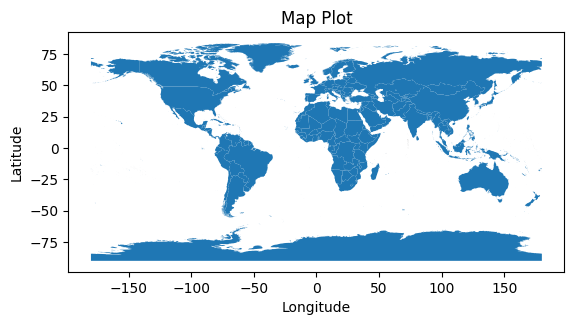

In [ ]:
gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip")

gdf.plot()

plt.title('Map Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Mean Temperature Difference Choropleth Map(mid vs present)**

The below code calculates mean temp difference for each country based on the centriod approach. Where it takes centriod coordinates of a country and look for the tas values of nearest coordinates in Netcdf file

In [ ]:
nc_file = "/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_mid_to_present.nc"
ds = xr.open_dataset(nc_file)

shapefile_path = "/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip"
gdf = gpd.read_file(shapefile_path)

mean_temperature_diff = []

for index, row in gdf.iterrows():
    geom = row["geometry"]
    centroid = geom.centroid
    lat = centroid.y
    lon = centroid.x
    tas_values = ds.tas.sel(lat=lat, lon=lon, method="nearest").values
    mean_diff = np.mean(tas_values)
    mean_temperature_diff.append(mean_diff)

gdf["mean_temperature_diff"] = mean_temperature_diff

# map using Plotly
fig = px.choropleth(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color="mean_temperature_diff",
    hover_name="ADMIN",
    projection="mercator",
    title="Mean Temperature Difference Choropleth Map",
    color_continuous_scale="Viridis",
)

fig.update_layout(
    geo=dict(
        center={"lat": 0, "lon": 0},
        projection_scale=12,
        visible=False,
    ),
    width=1200,
    height=800,
)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

**Mean Temperature Difference Choropleth Map(end vs present)**

In [ ]:
nc_file = "/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_end_to_present.nc"
ds = xr.open_dataset(nc_file)

shapefile_path = "/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip"
gdf = gpd.read_file(shapefile_path)

mean_temperature_diff = []

for index, row in gdf.iterrows():
    geom = row["geometry"]
    centroid = geom.centroid
    lat = centroid.y
    lon = centroid.x
    tas_values = ds.tas.sel(lat=lat, lon=lon, method="nearest").values
    mean_diff = np.mean(tas_values)
    mean_temperature_diff.append(mean_diff)

gdf["mean_temperature_diff"] = mean_temperature_diff

fig = px.choropleth(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color="mean_temperature_diff",
    hover_name="ADMIN",
    projection="mercator",
    title="Mean Temperature Difference Choropleth Map",
    color_continuous_scale="Viridis",
)

fig.update_layout(
    geo=dict(
        center={"lat": 0, "lon": 0},
        projection_scale=12,
        visible=False,
    ),
    width=1200,
    height=800,
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Mean Temperature Difference and std_dev(mid vs present)**

**CSV file**

In [ ]:
nc_file = "/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_mid_to_present.nc"
ds = xr.open_dataset(nc_file)

shapefile_path = "/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip"
gdf = gpd.read_file(shapefile_path)

# mean temperature difference for each country
mean_temperature_diff = []
std_dev_temperature_diff = []

for index, row in gdf.iterrows():
    geom = row["geometry"]
    centroid = geom.centroid
    lat = centroid.y
    lon = centroid.x
    tas_values = ds.tas.sel(lat=lat, lon=lon, method="nearest").values
    mean_diff = np.mean(tas_values)
    std_diff = np.std(tas_values)
    mean_temperature_diff.append(mean_diff)
    std_dev_temperature_diff.append(std_diff)

gdf["mean_temperature_diff"] = mean_temperature_diff
gdf["std_dev_temperature_diff"] = std_dev_temperature_diff

columns_to_export = ["ADMIN", "mean_temperature_diff", "std_dev_temperature_diff"]
gdf_export = gdf[columns_to_export]

output_csv_file = "/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_present_temperature_statistics_by_country.csv"

gdf_export.to_csv(output_csv_file, index=False)

**Present vs mid temp stats by country**

Using exterior coordinates method. This method takes the exterior coordinates of a polygon(country) and look for tas values of nearest coordinates in the Netcdf file and calculates the temp stats

In [ ]:
from multiprocessing import Pool

nc_file = "/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_mid_to_present.nc"
ds = xr.open_dataset(nc_file)

shapefile_path = "/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip"
gdf = gpd.read_file(shapefile_path)

def extract_tas_for_polygon(polygon):
    tas_values = []

    if polygon.geom_type == 'Polygon':
        polygons = [polygon]
    elif polygon.geom_type == 'MultiPolygon':
        polygons = polygon.geoms

    num_grids = 0

    for single_polygon in polygons:
        for coord in single_polygon.exterior.coords:
            lat, lon = coord
            tas_data = ds.tas.sel(lat=lat, lon=lon, method="nearest").values

            if np.isnan(tas_data):
                continue

            if not np.isscalar(tas_data):
                if np.ndim(tas_data) == 0:
                    tas_data = np.array([tas_data])

                tas_values.extend(tas_data)
                num_grids += len(tas_data)
            else:
                tas_values.append(tas_data)
                num_grids += 1

    return tas_values, num_grids

country_names = []
mean_temperature_diff = []
std_dev_temperature_diff = []
num_grids_used = []

#Multiprocessing
with Pool(processes=None) as pool:
    results = pool.map(extract_tas_for_polygon, gdf['geometry'])

for polygon, (result, num_grids) in zip(gdf['geometry'], results):
    if result:
        country_name = gdf[gdf['geometry'] == polygon]["ADMIN"].values[0]
        mean_diff = np.mean(result)
        std_diff = np.std(result)

        country_names.append(country_name)
        mean_temperature_diff.append(mean_diff)
        std_dev_temperature_diff.append(std_diff)
        num_grids_used.append(num_grids)

data = {
    "Country Name": country_names,
    "Mean Temperature Difference": mean_temperature_diff,
    "Std Dev Temperature Difference": std_dev_temperature_diff,
    "Number of Grids Used": num_grids_used,
}
df = pd.DataFrame(data)

gdf_combined = gdf.merge(df, left_on="ADMIN", right_on="Country Name")

output_shapefile = "/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_pres_temp_stats_country.shp"

gdf_combined.to_file(output_shapefile)

**Plotting the temp stats(mid vs present)**

In [ ]:
shapefile_path = "/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_pres_temp_stats_country.shp"
gdf_combined = gpd.read_file(shapefile_path)

fig = px.choropleth(gdf_combined,
                    geojson=gdf_combined.geometry,
                    locations=gdf_combined.index,
                    color="Mean Tempe",
                    hover_name="Country Na",
                    hover_data=["Std Dev Te"],
                    title="Mean and Standard Deviation of Temperature Difference by Country",
                    color_continuous_scale="Viridis",
                    labels={"Mean Temperature Difference": "Mean Temp Diff",
                            "Std Dev Temperature Difference": "Std Dev Temp Diff"},
                    projection="natural earth"
                   )
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

**Plotting the states/provinces shapefile**

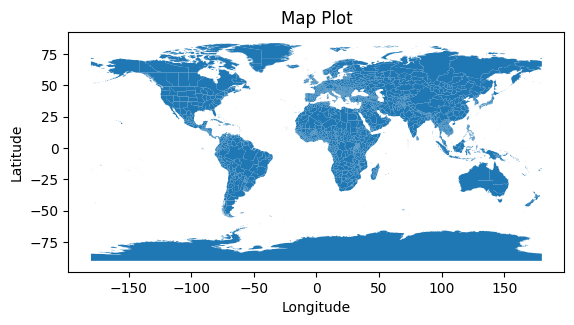

In [ ]:
gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_1_states_provinces.zip")
gdf.plot()
plt.title('Map Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Mid vs present temp stats by state**

In [ ]:
nc_file = "/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_mid_to_present.nc"
ds = xr.open_dataset(nc_file)

shapefile_path = "/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_1_states_provinces.zip"
gdf = gpd.read_file(shapefile_path)

def extract_tas_for_polygon(polygon):
    tas_values = []

    if polygon.geom_type == 'Polygon':
        polygons = [polygon]
    elif polygon.geom_type == 'MultiPolygon':
        polygons = polygon.geoms

    num_grids = 0

    for single_polygon in polygons:
        for coord in single_polygon.exterior.coords:
            lat, lon = coord
            tas_data = ds.tas.sel(lat=lat, lon=lon, method="nearest").values

            if np.isnan(tas_data):
                continue

            if not np.isscalar(tas_data):
                if np.ndim(tas_data) == 0:
                    tas_data = np.array([tas_data])

                tas_values.extend(tas_data)
                num_grids += len(tas_data)
            else:
                tas_values.append(tas_data)
                num_grids += 1

    return tas_values, num_grids

state_names = []
mean_temperature_diff = []
std_dev_temperature_diff = []

with Pool(processes=None) as pool:
    results = pool.map(extract_tas_for_polygon, gdf['geometry'])

for polygon, (result, _) in zip(gdf['geometry'], results):
    if result:
        state_name = gdf[gdf['geometry'] == polygon]["name"].values[0]
        mean_diff = np.mean(result)
        std_diff = np.std(result)

        state_names.append(state_name)
        mean_temperature_diff.append(mean_diff)
        std_dev_temperature_diff.append(std_diff)

data = {
    "State/Province Name": state_names,
    "Mean Temperature Difference": mean_temperature_diff,
    "Std Dev Temperature Difference": std_dev_temperature_diff,
}
df = pd.DataFrame(data)

gdf_combined = gdf.merge(df, left_on="name", right_on="State/Province Name")

output_shapefile = "/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_pres_temp_stats_state.shp"

gdf_combined.to_file(output_shapefile)

**Converting the lon from [0,360] to [-180,180] in the Netcdf file**

In [ ]:
nc_file_path = '/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_mid_to_present.nc'
ds = xr.open_dataset(nc_file_path)
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)
print(ds.lon)
ds.to_netcdf('/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_mid_to_present.nc')


After adjusting the lon values in netcdf file:
Mask is created for each country and stats are calculated using tas data inside country's boundary only.

In [ ]:
gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip")
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_mid_to_present.nc') as src:
    temperature_data = src.read(1)
    transform = src.transform
mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():
    mask = geometry_mask([row.geometry], out_shape=temperature_data.shape, transform=transform, invert=True)

    masked_data = np.ma.masked_array(temperature_data, mask=~mask)
    mean_temp = np.mean(masked_data)
    std_dev_temp = np.std(masked_data)
    grid_count = np.sum(mask)

    mean_temperatures.append(mean_temp)
    std_dev_temperatures.append(std_dev_temp)
    grid_counts.append(grid_count)

results_df = pd.DataFrame({
    'country_name': gdf['ADMIN'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})
results_df = results_df.dropna()
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/temp_stats_mid_vs_pres_country_final.csv', index=False)


In [ ]:
import rasterio
from rasterio.features import geometry_mask
gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip")
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_mid_to_present.nc') as src:

    temperature_data = src.read(1)
    transform = src.transform

mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():
    mask = geometry_mask([row.geometry], out_shape=temperature_data.shape, transform=transform, invert=True)

    masked_data = np.ma.masked_array(temperature_data, mask=~mask)
    mean_temp = np.mean(masked_data)
    std_dev_temp = np.std(masked_data)
    grid_count = np.sum(mask)

    mean_temperatures.append(mean_temp)
    std_dev_temperatures.append(std_dev_temp)
    grid_counts.append(grid_count)

results_df = pd.DataFrame({
    'country_name': gdf['ADMIN'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})
results_df = results_df.dropna()

gdf = gdf.merge(results_df, left_on='ADMIN', right_on='country_name')
gdf = gdf.applymap(lambda x: np.nan if type(x) is np.ma.core.MaskedConstant else x)
gdf_geojson = gdf.to_json()

m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=gdf_geojson,
    name='choropleth',
    data=gdf,
    columns=['ADMIN', 'mean_temperature'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Temperature Difference'
).add_to(m)
folium.LayerControl().add_to(m)
m


Output hidden; open in https://colab.research.google.com to view.

Grid cell size method

In [3]:
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from affine import Affine
import folium
from folium import FeatureGroup, LayerControl

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip")
netcdf_file_path = "/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_end_to_present.nc"

with rasterio.open(netcdf_file_path) as src:
    temperature_data = src.read(1)

    transform = src.transform
    height, width = temperature_data.shape

    grid_cells = []

    for row in range(height):
        for col in range(width):
            x, y = transform * (col, row)
            x2, y2 = transform * (col + 1, row + 1)
            polygon = Polygon([(x, y), (x2, y), (x2, y2), (x, y2)])
            temperature = temperature_data[row, col]
            grid_cells.append({'geometry': polygon, 'temperature': temperature})
    grid_gdf = gpd.GeoDataFrame(grid_cells)
    grid_gdf.crs = "EPSG:4326"
mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():
    country_gdf = gpd.GeoDataFrame([row], geometry=[row.geometry], crs=gdf.crs)

    intersections = gpd.overlay(grid_gdf, country_gdf, how='intersection')
    total_area = row.geometry.area
    weighted_temp_sum = 0
    grid_count = 0
    for _, intersection_row in intersections.iterrows():
      intersection_area = intersection_row.geometry.area
      temperature = intersection_row.temperature
      weighted_temp_sum += (intersection_area / total_area) * temperature
      grid_count += 1
    mean_temperature = weighted_temp_sum
    mean_temperatures.append(mean_temperature)
    grid_counts.append(grid_count)
    if grid_count > 1:
      temperatures = intersections['temperature'].to_numpy()
      std_dev = np.std(temperatures)
    else:
      std_dev = 0

    std_dev_temperatures.append(std_dev)

results_df = pd.DataFrame({
    'country_name': gdf['ADMIN'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})
results_df = results_df.dropna()

gdf_merged = gdf.merge(results_df, left_on='ADMIN', right_on='country_name', how='left')

'''results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/585_end_vs_pres_country.csv', index=False)'''


map2= folium.Map(location=[0, 0], zoom_start=2)

common_scale_min = 0.03
common_scale_max = 6.85

num_bins = 7

threshold_scale = np.linspace(common_scale_min, common_scale_max, num_bins).tolist()

choropleth = folium.Choropleth(
    geo_data=gdf_merged,
    data=gdf_merged,
    columns=['ADMIN', 'mean_temperature'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    threshold_scale=threshold_scale,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Weighted Mean Temperatures by Country',
    highlight=True
).add_to(map2)

tooltip = folium.GeoJsonTooltip(
    fields=['ADMIN', 'mean_temperature'],
    aliases=['Country', 'Mean Temp Diff (°C)'],
    labels=True,
    sticky=False
)

choropleth.geojson.add_child(tooltip)


LayerControl().add_to(map2)


title_html = '''
     <h3 align="center" style="font-size:20px"><b>Change in average temperature from present to end-century decade(SSP585)</b></h3>
     '''


map2.get_root().html.add_child(folium.Element(title_html))


'''map2.save("/content/drive/MyDrive/Colab Notebooks/capstone/map2.html")'''


'map2.save("/content/drive/MyDrive/Colab Notebooks/capstone/map2.html")'

In [4]:
!pip install rasterio
!pip install affine

import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from affine import Affine
import folium
from folium import FeatureGroup, LayerControl

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip")
netcdf_file_path = "/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_mid_to_present.nc"

with rasterio.open(netcdf_file_path) as src:

    temperature_data = src.read(1)
    transform = src.transform

    height, width = temperature_data.shape

    grid_cells = []

    for row in range(height):
        for col in range(width):
            x, y = transform * (col, row)
            x2, y2 = transform * (col + 1, row + 1)

            polygon = Polygon([(x, y), (x2, y), (x2, y2), (x, y2)])

            temperature = temperature_data[row, col]

            grid_cells.append({'geometry': polygon, 'temperature': temperature})


    grid_gdf = gpd.GeoDataFrame(grid_cells)
    grid_gdf.crs = "EPSG:4326"

mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():

    country_gdf = gpd.GeoDataFrame([row], geometry=[row.geometry], crs=gdf.crs)
    intersections = gpd.overlay(grid_gdf, country_gdf, how='intersection')
    total_area = row.geometry.area
    weighted_temp_sum = 0
    grid_count = 0
    for _, intersection_row in intersections.iterrows():
      intersection_area = intersection_row.geometry.area
      temperature = intersection_row.temperature
      weighted_temp_sum += (intersection_area / total_area) * temperature
      grid_count += 1

    mean_temperature = weighted_temp_sum
    mean_temperatures.append(mean_temperature)
    grid_counts.append(grid_count)

    if grid_count > 1:
      temperatures = intersections['temperature'].to_numpy()
      std_dev = np.std(temperatures)
    else:
      std_dev = 0

    std_dev_temperatures.append(std_dev)

results_df = pd.DataFrame({
    'country_name': gdf['ADMIN'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})

results_df = results_df.dropna()

gdf_merged = gdf.merge(results_df, left_on='ADMIN', right_on='country_name', how='left')


'''results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/585_end_vs_pres_country.csv', index=False)'''

map1 = folium.Map(location=[0, 0], zoom_start=2)

common_scale_min = 0.03
common_scale_max = 6.85

num_bins = 7

threshold_scale = np.linspace(common_scale_min, common_scale_max, num_bins).tolist()

choropleth = folium.Choropleth(
    geo_data=gdf_merged,
    data=gdf_merged,
    columns=['ADMIN', 'mean_temperature'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    threshold_scale=threshold_scale,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Weighted Mean Temperatures by Country',
    highlight=True
).add_to(map1)

tooltip = folium.GeoJsonTooltip(
    fields=['ADMIN', 'mean_temperature'],
    aliases=['Country', 'Mean Temp Diff (°C)'],
    labels=True,
    sticky=False
)

choropleth.geojson.add_child(tooltip)

LayerControl().add_to(map1)
title_html = '''
     <h3 align="center" style="font-size:20px"><b>Change in average temperature from present to mid-century decade(SSP585)</b></h3>
     '''
map1.get_root().html.add_child(folium.Element(title_html))

'''map1.save("/content/drive/MyDrive/Colab Notebooks/capstone/test_map1.html")'''


'map1.save("/content/drive/MyDrive/Colab Notebooks/capstone/test_map1.html")'

For States

In [5]:
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from affine import Affine
import folium
from folium import FeatureGroup, LayerControl

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_1_states_provinces.zip")
netcdf_file_path = "/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_mid_to_present.nc"

with rasterio.open(netcdf_file_path) as src:
    temperature_data = src.read(1)
    transform = src.transform
    height, width = temperature_data.shape
    grid_cells = []

    for row in range(height):
        for col in range(width):
            x, y = transform * (col, row)
            x2, y2 = transform * (col + 1, row + 1)
            polygon = Polygon([(x, y), (x2, y), (x2, y2), (x, y2)])
            temperature = temperature_data[row, col]
            grid_cells.append({'geometry': polygon, 'temperature': temperature})
    grid_gdf = gpd.GeoDataFrame(grid_cells)
    grid_gdf.crs = "EPSG:4326"
mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():
    state_gdf = gpd.GeoDataFrame([row], geometry=[row.geometry], crs=gdf.crs)
    intersections = gpd.overlay(grid_gdf, state_gdf, how='intersection')
    total_area = row.geometry.area
    weighted_temp_sum = 0
    grid_count = 0
    for _, intersection_row in intersections.iterrows():
        intersection_area = intersection_row.geometry.area
        temperature = intersection_row.temperature
        weighted_temp_sum += (intersection_area / total_area) * temperature
        grid_count += 1

    mean_temperature = weighted_temp_sum
    mean_temperatures.append(mean_temperature)
    grid_counts.append(grid_count)

    if grid_count > 1:
        temperatures = intersections['temperature'].to_numpy()
        std_dev = np.std(temperatures)
    else:
        std_dev = 0
    std_dev_temperatures.append(std_dev)

results_df = pd.DataFrame({
    'state_name': gdf['name'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})

results_df = results_df.dropna()

'''results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_pres_state.csv', index=False)'''

merged_gdf = gdf.merge(results_df, left_on='name', right_on='state_name')

map = folium.Map(location=[0, 0], zoom_start=2)

common_scale_min = -1.06
common_scale_max = 8.94

num_bins = 7

threshold_scale = np.linspace(common_scale_min, common_scale_max, num_bins).tolist()

choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=['name', 'mean_temperature'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    threshold_scale=threshold_scale,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Weighted Mean Temperature',
    highlight=True
).add_to(map)

tooltip = folium.GeoJsonTooltip(
    fields=['name', 'mean_temperature'],
    aliases=['State', 'Mean Temp Diff (°C)'],
    labels=True,
    sticky=False
)

choropleth.geojson.add_child(tooltip)

LayerControl().add_to(map)

title_html = '''
     <h3 align="center" style="font-size:20px"><b>State-wise change in average temperature: Present to Mid-Century</b></h3>
     '''
map.get_root().html.add_child(folium.Element(title_html))

'''map.save('/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_pres_states.html')'''

"map.save('/content/drive/MyDrive/Colab Notebooks/capstone/mid_vs_pres_states.html')"

In [6]:
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from affine import Affine
import folium
from folium import FeatureGroup, LayerControl

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_1_states_provinces.zip")
netcdf_file_path = "/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_end_to_present.nc"
with rasterio.open(netcdf_file_path) as src:
    temperature_data = src.read(1)
    transform = src.transform
    height, width = temperature_data.shape
    grid_cells = []

    for row in range(height):
        for col in range(width):
            x, y = transform * (col, row)
            x2, y2 = transform * (col + 1, row + 1)
            polygon = Polygon([(x, y), (x2, y), (x2, y2), (x, y2)])
            temperature = temperature_data[row, col]
            grid_cells.append({'geometry': polygon, 'temperature': temperature})
    grid_gdf = gpd.GeoDataFrame(grid_cells)
    grid_gdf.crs = "EPSG:4326"

mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():
    state_gdf = gpd.GeoDataFrame([row], geometry=[row.geometry], crs=gdf.crs)
    intersections = gpd.overlay(grid_gdf, state_gdf, how='intersection')
    total_area = row.geometry.area
    weighted_temp_sum = 0
    grid_count = 0
    for _, intersection_row in intersections.iterrows():
        intersection_area = intersection_row.geometry.area
        temperature = intersection_row.temperature
        weighted_temp_sum += (intersection_area / total_area) * temperature
        grid_count += 1
    mean_temperature = weighted_temp_sum
    mean_temperatures.append(mean_temperature)
    grid_counts.append(grid_count)
    if grid_count > 1:
        temperatures = intersections['temperature'].to_numpy()
        std_dev = np.std(temperatures)
    else:
        std_dev = 0

    std_dev_temperatures.append(std_dev)

results_df = pd.DataFrame({
    'state_name': gdf['name'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})

results_df = results_df.dropna()

'''results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/end_vs_pres_state.csv', index=False)'''

merged_gdf = gdf.merge(results_df, left_on='name', right_on='state_name')

map = folium.Map(location=[0, 0], zoom_start=2)

common_scale_min = -1.06
common_scale_max = 8.94

num_bins = 7

threshold_scale = np.linspace(common_scale_min, common_scale_max, num_bins).tolist()

choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=['name', 'mean_temperature'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    threshold_scale=threshold_scale,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Weighted Mean Temperature',
    highlight=True
).add_to(map)

tooltip = folium.GeoJsonTooltip(
    fields=['name', 'mean_temperature'],
    aliases=['State', 'Mean Temp Diff (°C)'],
    labels=True,
    sticky=False
)

choropleth.geojson.add_child(tooltip)
LayerControl().add_to(map)
title_html = '''
     <h3 align="center" style="font-size:20px"><b>State-wise change in average temperature: Present to End-Century</b></h3>
     '''
map.get_root().html.add_child(folium.Element(title_html))
'''map.save('/content/drive/MyDrive/Colab Notebooks/capstone/end_vs_pres_states.html')'''

"map.save('/content/drive/MyDrive/Colab Notebooks/capstone/end_vs_pres_states.html')"

**Decadal average for month**

In [ ]:
import xarray as xr

file_paths = [f'/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_{year}0101-{year}1231.nc' for year in range(2015, 2025)]

january_datasets = []
for file_path in file_paths:
    ds = xr.open_dataset(file_path)
    january_data = ds.sel(time=ds['time'].dt.month == 10)
    january_datasets.append(january_data)

all_january_data = xr.concat(january_datasets, dim='time')

decadal_january_average_kelvin = all_january_data['tas'].mean(dim='time')
decadal_january_average_celsius = decadal_january_average_kelvin - 273.15

output_file_path = '/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/Monthly/Decadal_avg_October.nc'
decadal_january_average_celsius.to_netcdf(output_file_path)



Seasonal temparature anomalies

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


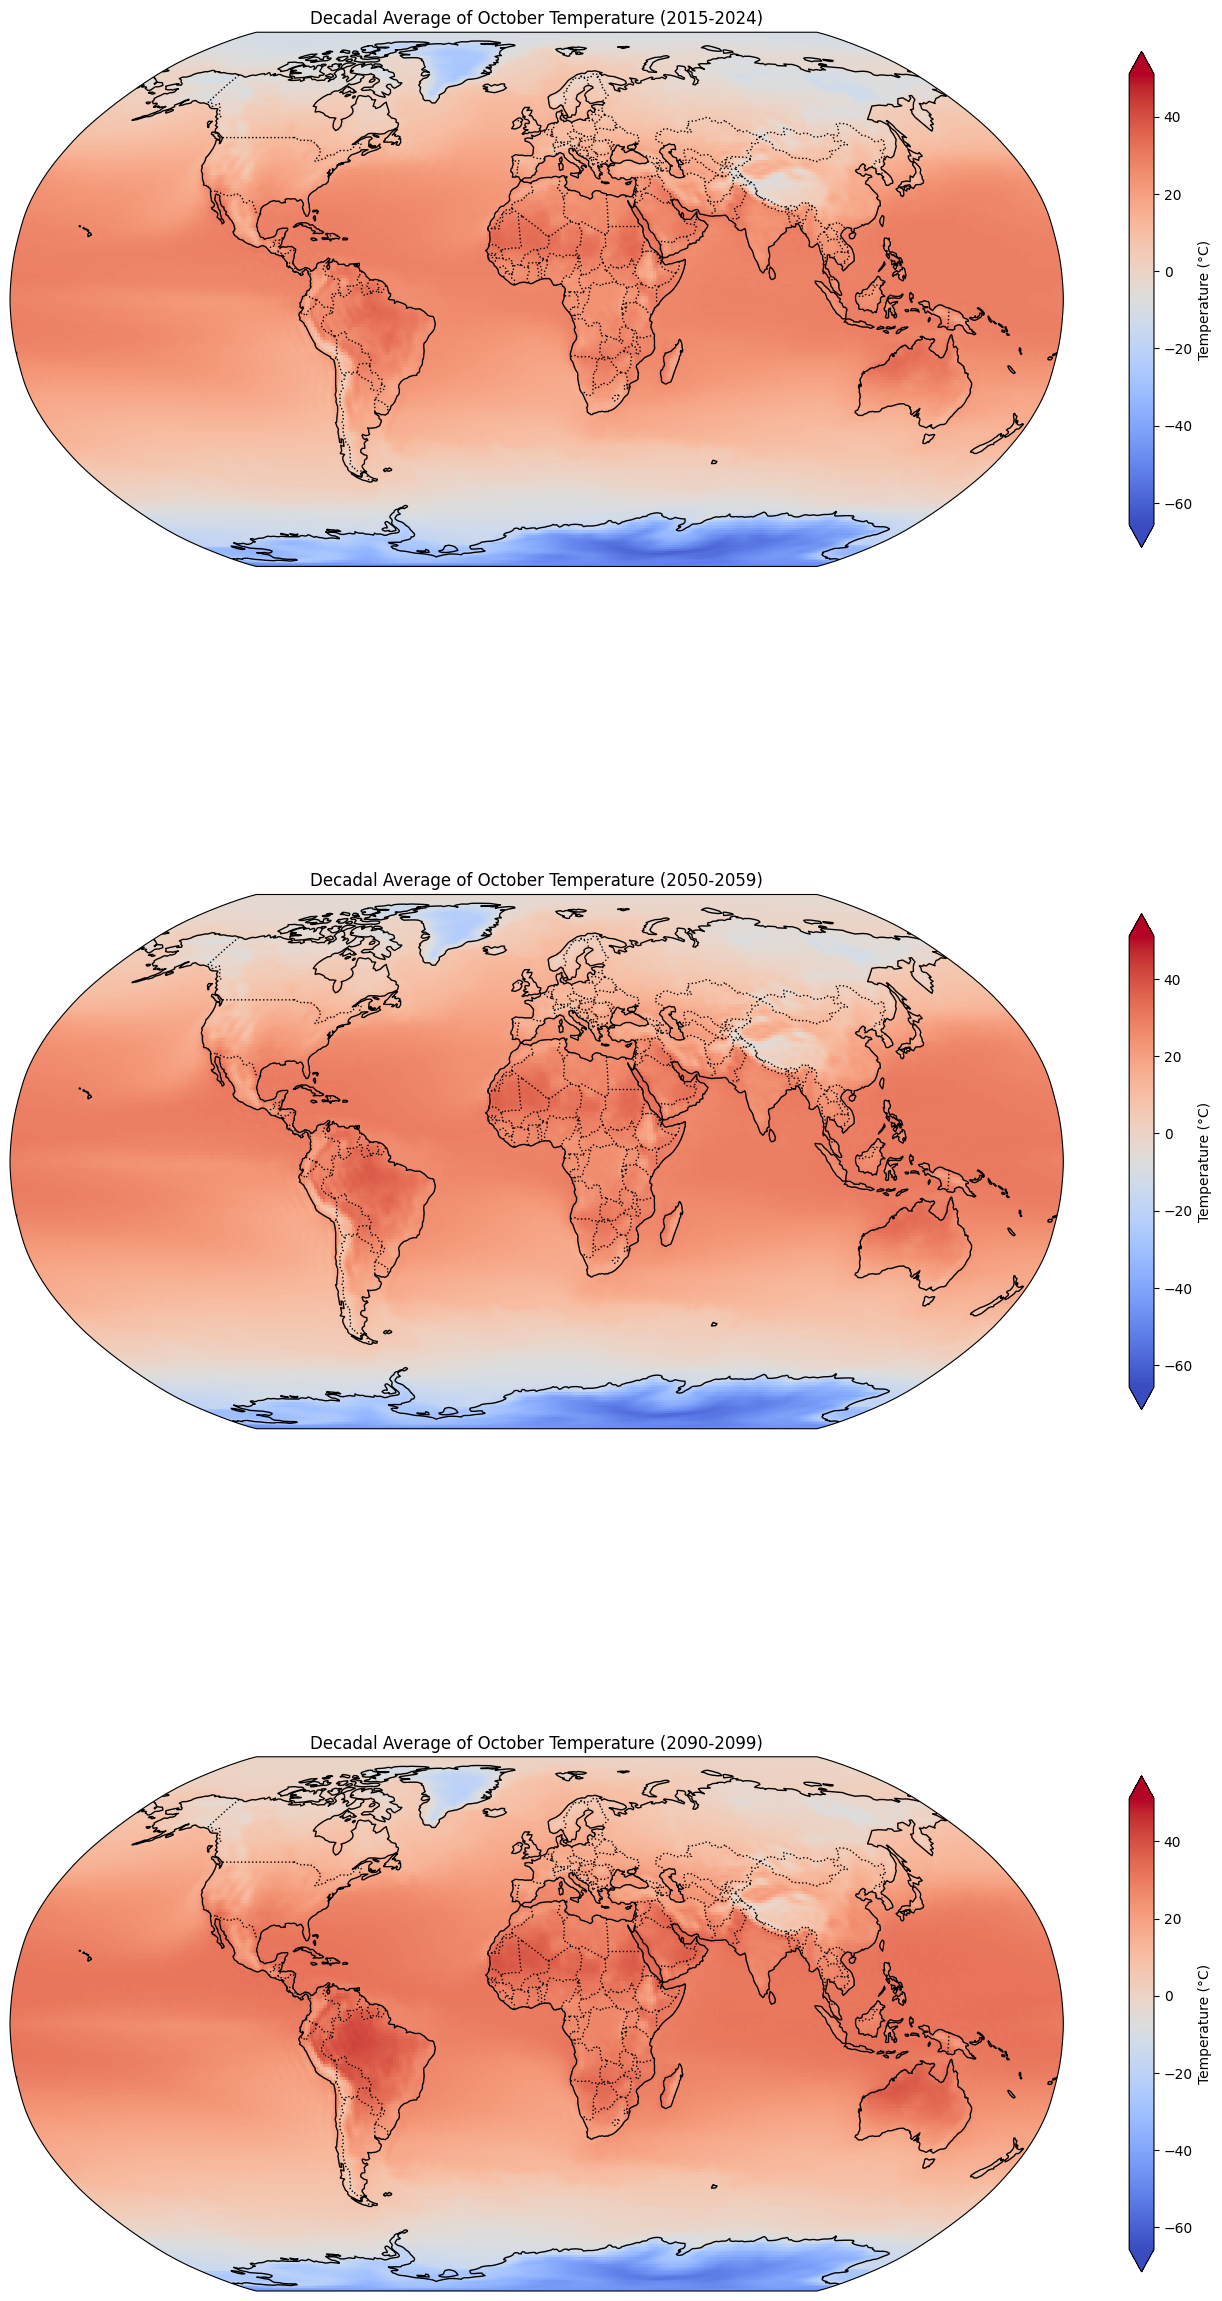

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

def plot_decadal_average(ax, data, title, vmin=-65.67, vmax=51.10, cmap='coolwarm'):
    ax.set_global()
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    data.plot(ax=ax, transform=ccrs.PlateCarree(),
              vmin=vmin, vmax=vmax, cmap=cmap,
              cbar_kwargs={'extend': 'both', 'shrink': 0.5, 'label': 'Temperature (°C)'})
    ax.set_title(title)

ds1 = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/capstone/2015-2024/Monthly/Decadal_avg_October.nc')
ds2 = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/capstone/2050-2059/Monthly/Decadal_avg_October.nc')
ds3 = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/capstone/2090-2099/Monthly/Decadal_avg_October.nc')

tas1 = ds1['tas']
tas2 = ds2['tas']
tas3 = ds3['tas']

fig, axs = plt.subplots(3, 1, figsize=(14, 28), subplot_kw={'projection': ccrs.Robinson()})

plot_decadal_average(axs[0], tas1, 'Decadal Average of October Temperature (2015-2024)')
plot_decadal_average(axs[1], tas2, 'Decadal Average of October Temperature (2050-2059)')
plot_decadal_average(axs[2], tas3, 'Decadal Average of October Temperature (2090-2099)')

plt.tight_layout(pad=3.0)
'''plt.savefig('/content/drive/MyDrive/Colab Notebooks/capstone/Monthly/test.png', dpi=10)'''
plt.show


